In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data= pd.read_csv('C:/Users/Dell/PycharmProjects/AQIndex/Data/Real-Data/real_comb.csv')

In [9]:
data.head()

,T,TM,Tm,H,W,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [34]:
data.isna().sum()

T        0
TM       0
Tm       0
H        0
W        0
V        0
VM       0
PM2.5    0
dtype: int64

In [29]:
data['PM2.5'].count()

736

In [32]:
data[data['PM2.5']== np.NaN]

,T,TM,Tm,H,W,V,VM,PM2.5


In [33]:
data.dropna(inplace= True)

In [40]:
x= data.iloc[:,:-1]
y=data.iloc[:,-1]

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test,y_train, y_test = train_test_split(x,y, train_size=0.3, random_state=3)

In [44]:
reg= LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.429108545975584

In [45]:
reg.score(x_test,y_test)

0.36047016395793297

### Linear regression using Cross Validation

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [47]:
lin_reg=LinearRegression(0)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass fit_intercept=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [59]:
mse= cross_val_score(lin_reg, x,y, scoring= 'neg_mean_squared_error', cv=4)

In [60]:
mse.mean()

-5656.145329302736

## Ridge regression

In [81]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [114]:
parameter= {'alpha': [1e-15,1e-10,1e-5,0,10,15,20,25,30,40,50]}

In [115]:
lass=Lasso()

In [122]:
lass_reg= GridSearchCV(lass,parameter,cv=5)

In [123]:
lass_reg.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310749.92309165065, tolerance: 115.60981181911895
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316624.4697165775, tolerance: 112.667196233576
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340900.10471591406, tolerance: 120.81393865494792
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0, 10, 15, 20, 25, 30,
                                   40, 50]})

In [124]:
lass_reg.score(x_train,y_train)

0.41674104457556926

In [125]:
lass_reg.score(x_test,y_test)

0.36816085274774624

In [126]:
lass_reg.best_score_

0.38265877251713365

In [127]:
lass_reg.best_params_

{'alpha': 10}

## Ridge Regression

In [108]:
lass_reg.score(x_test,y_test)

0.36816085274774624

In [110]:
reg.score(x_test,y_test)

0.36047016395793297

In [111]:
from sklearn.linear_model import Ridge

In [112]:
rid= Ridge()

In [113]:
parameter= {'alpha': [1e-15,1e-10,1e-5,0,10,15,20,25,30,40,50]}

In [129]:
ridge_reg=GridSearchCV(rid,parameter, cv=5)

In [130]:
ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0, 10, 15, 20, 25, 30,
                                   40, 50]})

In [131]:
ridge_reg.score(x_train,y_train)

0.425438897833318

In [132]:
ridge_reg.score(x_test,y_test)

0.36572843808035194

In [134]:
ridge_reg.best_params_

{'alpha': 50}

In [135]:
ridge_reg.best_score_

0.3797559480524981

In [133]:
from sklearn import metrics

In [ ]:
print('MSE' + str(metrics.mean))

#### Model Evaluation

In [136]:
import seaborn as sns

In [139]:
prediction= lass_reg.predict(x_test)
#prediction

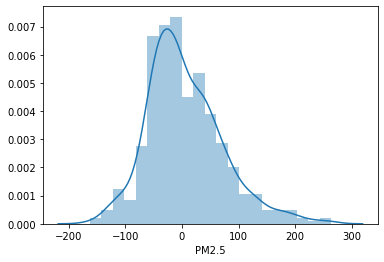

In [140]:
sns.distplot(y_test-prediction)

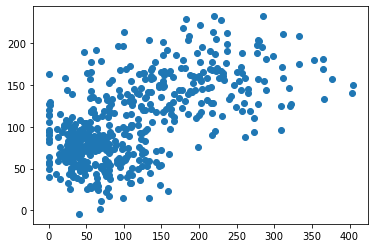

In [141]:
plt.scatter(y_test,prediction)

In [142]:
from sklearn import metrics

In [147]:
print('MAE: ' + str(metrics.mean_absolute_error(y_test,prediction)))
print('MSE: ' + str(metrics.mean_squared_error(y_test,prediction)))
print('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_test,prediction))))

MAE: 51.26654110661968
MSE: 4473.1878560839095
RMSE: 66.88189483024468


####  Save the model

In [150]:
import pickle

In [151]:
#Opem the file where you want to store the data

In [153]:
file= open('Ridge_Lasso.pkl', 'wb')
pickle.dump(lass_reg,file)